# Nuages de mots

## Imports et stopwords

In [21]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "prix", "maison", 
       "an", "agence", "louer","très", "vendre", "bon", "heure", "place", "demande", "ecr", 
       "francs", "grand", "midi", "état", "vend", "belle", "ruo", "avenue", "brux", "nord",
       "fille", "gaz", "bonne", "adr", "vente",  "etc", "neuf", "bon", "libre", "mod", 
       "jours", "mois", "salle", "chambre", "eau", "app", "dés", "près", "grand", "grande", 
       "un", "une", "tél", "occasion", "matin", "soir", "beau", "on", "auto", "tout", "toute",
       "bail", "avant", "après", "jeune", "vieux", "disp", "belge", "belgique", "cuis", "villa",
       "cour", "notaire", "cours", "bel","pers", "bureau", "quart", "pays", "suite", "cap", "peu", 
       "situation", "garage", "mai", "gros", "rossel", "ros", "chez", "centre", "lundi", "mardi", 
       "mercredi", "jeudi", "vendredi", "samedi", "dimanche",  "fer", "mr", "mme", "hôtel", "jardin", 
       "jard", "gar", "porte", "garni", "pension", "bain", "bons", "jour", "écrire", "ans", "part", 
       "ecrire", "heures", "janvier", "lieu", "dame", "par", "rez", "adresser", "loyer", "meuble", 
       "meubles", "bons", "pet", "plusieurs", "neuve", "achat", "mén", "temps", "trav", "sér", 
       "mètres", "lux", "vue", "réf", "ord", "aven", "cherche", "sal", "aveo", "dos", "ler","offre", 
       "petit", "petits", "petites", "lib", "lit", "enf", "fem", "téléphone", "SIT", "faç", "env", 
       "cher","jeu", "jn", "jne", "cause", "mari", "quelques", "quelque", "masmoment", "salon", 
       "chambre", "chambres", "celui", "celle", "lui", "ont", "été", "vers", "pour", "or", "ni", 
       "car", "mais", "où", "et", "enfin", "enfants", "femme", "appart", "lot", "lots", "céder", 
       "prés", "ordre", "bois", "Bruxelles", "Louise", "bruxelles", "chaussée", "français", "conf", "saint", "travail"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [25]:
data_path = '../data'
txt_path = '../../data/txt'

txts = [
    f for f in os.listdir(txt_path)
    if os.path.isfile(os.path.join(txt_path, f))
]

len(txts)

987

In [21]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [26]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

        


In [27]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

987

In [28]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:987]

"^a_Mî@20jagMâ: Sam. ler et dim. 2 février 1.'17 ELITES Dans sa conférence de jeudi à Bruxelles, Roger Garaudy a eu une définition mordante de l'ente : « des intellectuels qui s'appellent l'élite et qui sont parfois les seuls à s'appeler ainsi ». Rien n'est plus cruellement vrai. Pendant des lustres, le commun des mortels a rangé dans l'élite quelques messieurs bien habil. lés, possédant, comme on dit, un joli brin de plume, et qui par. latent bien. Or, la guerre et l'après-guerre ont prouvé que la plupart de ces êtres n'étaient que tonneaux vides. Ces élites-là _c montaient le cou. C'étaient de fausses élites. La véritable élite n'est pas l'apanage d'une classe. Je connais des hommes d'élite qui ont les mains calleuses et les vêtements râpés. Mais ils ont le cœur bien accroché. Ils se sentent solidaires du voisin. Ils luttent, ils espèrent avec lui. Us ont la foi et ils sourient. Ils s'Interrogent, se cherchent et... se trouvent. Us lisent, étudient, réfléchissent. Ils viv"

In [29]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

    # Écrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'

# Créer le dossier s'il n'existe pas
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

# Fichier de sortie unique (pour tout le corpus)
output_file = 'corpus.txt'   # tu peux changer le nom si tu veux

with open(os.path.join(temp_path, output_file), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [30]:
# Lire le contenu du fichier temporaire et inspecter les "déchets"
output_file = 'corpus.txt'  # même nom que dans l'étape précédente

with open(os.path.join(temp_path, output_file), 'r', encoding='utf-8') as f:
    before = f.read()

# Afficher les 500 premiers caractères pour inspection
before[:500]

"^a_Mî@20jagMâ: Sam. ler et dim. 2 février 1.'17 ELITES Dans sa conférence de jeudi à Bruxelles, Roger Garaudy a eu une définition mordante de l'ente : « des intellectuels qui s'appellent l'élite et qui sont parfois les seuls à s'appeler ainsi ». Rien n'est plus cruellement vrai. Pendant des lustres, le commun des mortels a rangé dans l'élite quelques messieurs bien habil. lés, possédant, comme on dit, un joli brin de plume, et qui par. latent bien. Or, la guerre et l'après-guerre ont prouvé que "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [31]:
def clean_text(input_file, folder=None, output_suffix="_clean"):
    """
    Nettoie un fichier texte en conservant uniquement les mots alphabétiques 
    de plus de 2 lettres, en majuscules et en excluant les stopwords.

    Parameters:
    - input_file : nom du fichier d'entrée (ex: 'corpus.txt')
    - folder : chemin du dossier contenant le fichier (optionnel)
    - output_suffix : suffixe pour le fichier nettoyé (défaut "_clean")
    """
    if folder is None:
        input_path = input_file
        output_path = input_file.replace(".txt", f"{output_suffix}.txt")
    else:
        input_path = os.path.join(folder, input_file)
        output_path = os.path.join(folder, input_file.replace(".txt", f"{output_suffix}.txt"))

    # Ouvrir le fichier de sortie
    with open(output_path, "w", encoding='utf-8') as output:
        # Lire le fichier d'entrée
        with open(input_path, 'r', encoding='utf-8') as f:
            text = f.read()
            words = nltk.wordpunct_tokenize(text)
            # Filtrer les mots : longueur >2, alphabétiques, pas dans les stopwords
            kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string)

    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [32]:
clean_text('corpus.txt', folder=temp_path)

'Output has been written in ../../data/tmp\\corpus_clean.txt!'

In [37]:
# Vérifier le résultat sur le fichier nettoyé corpus_clean.txt
output_file = 'corpus_clean.txt'  # nom du fichier généré par clean_text

with open(os.path.join(temp_path, output_file), 'r', encoding='utf-8') as f:
    after = f.read()

# Afficher les 500 premiers caractères
after[:500]

'SAM DIM FÉVRIER ELITES CONFÉRENCE ROGER GARAUDY DÉFINITION MORDANTE ENTE INTELLECTUELS APPELLENT ÉLITE PARFOIS SEULS APPELER RIEN CRUELLEMENT VRAI LUSTRES COMMUN MORTELS RANGÉ ÉLITE MESSIEURS HABIL LÉS POSSÉDANT JOLI BRIN PLUME LATENT GUERRE GUERRE PROUVÉ PLUPART ÊTRES TONNEAUX VIDES ÉLITES MONTAIENT COU FAUSSES ÉLITES VÉRITABLE ÉLITE APANAGE CLASSE CONNAIS HOMMES ÉLITE MAINS CALLEUSES VÊTEMENTS RÂPÉS CŒUR ACCROCHÉ SENTENT SOLIDAIRES VOISIN LUTTENT ESPÈRENT FOI SOURIENT INTERROGENT CHERCHENT TRO'

## Nuage de mots

### Afficher les termes les plus fréquents


In [38]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('GOUVERNEMENT', 8072), ('MINISTRE', 6987), ('LEURS', 5656), ('POLITIQUE', 5480), ('PRÉSIDENT', 5207), ('GUERRE', 4630), ('GÉNÉRAL', 4505), ('PREMIER', 4002), ('CONSEIL', 3789), ('ETAT', 3732), ('MILLIONS', 3721), ('FRANCE', 3628), ('PARIS', 3479), ('CEUX', 3462), ('PARTI', 3313), ('POINT', 3269), ('QUESTION', 3262), ('ETATS', 3246), ('VIE', 3106), ('DÉJÀ', 3088), ('LOI', 3039), ('MONDE', 2993), ('ELLES', 2977), ('ÉCONOMIQUE', 2947), ('UNIS', 2879), ('FOIS', 2873), ('ALORS', 2867), ('TOUJOURS', 2850), ('NOUVEAU', 2820), ('DEVANT', 2779), ('NOUVELLE', 2751), ('ANNÉE', 2731), ('AFFAIRES', 2727), ('FIN', 2723), ('HUI', 2697), ('PREMIÈRE', 2678), ('MARCHÉ', 2652), ('PLAN', 2590), ('ÉGALEMENT', 2548), ('NATIONALE', 2538), ('BELGES', 2511), ('AUJOURD', 2511), ('DERNIER', 2503), ('EUROPE', 2503), ('LONDRES', 2474), ('PROJET', 2435), ('ALLEMAGNE', 2421), ('MOMENT', 2417), ('COMPTE', 2376), ('VOIR', 2373), ('CAS', 2373), ('RIEN', 2360), ('EFFET', 2348), ('COMMISSION', 2326), ('ÉCONOMIE', 2307)

### Créer, stocker et afficher le nuage de mots

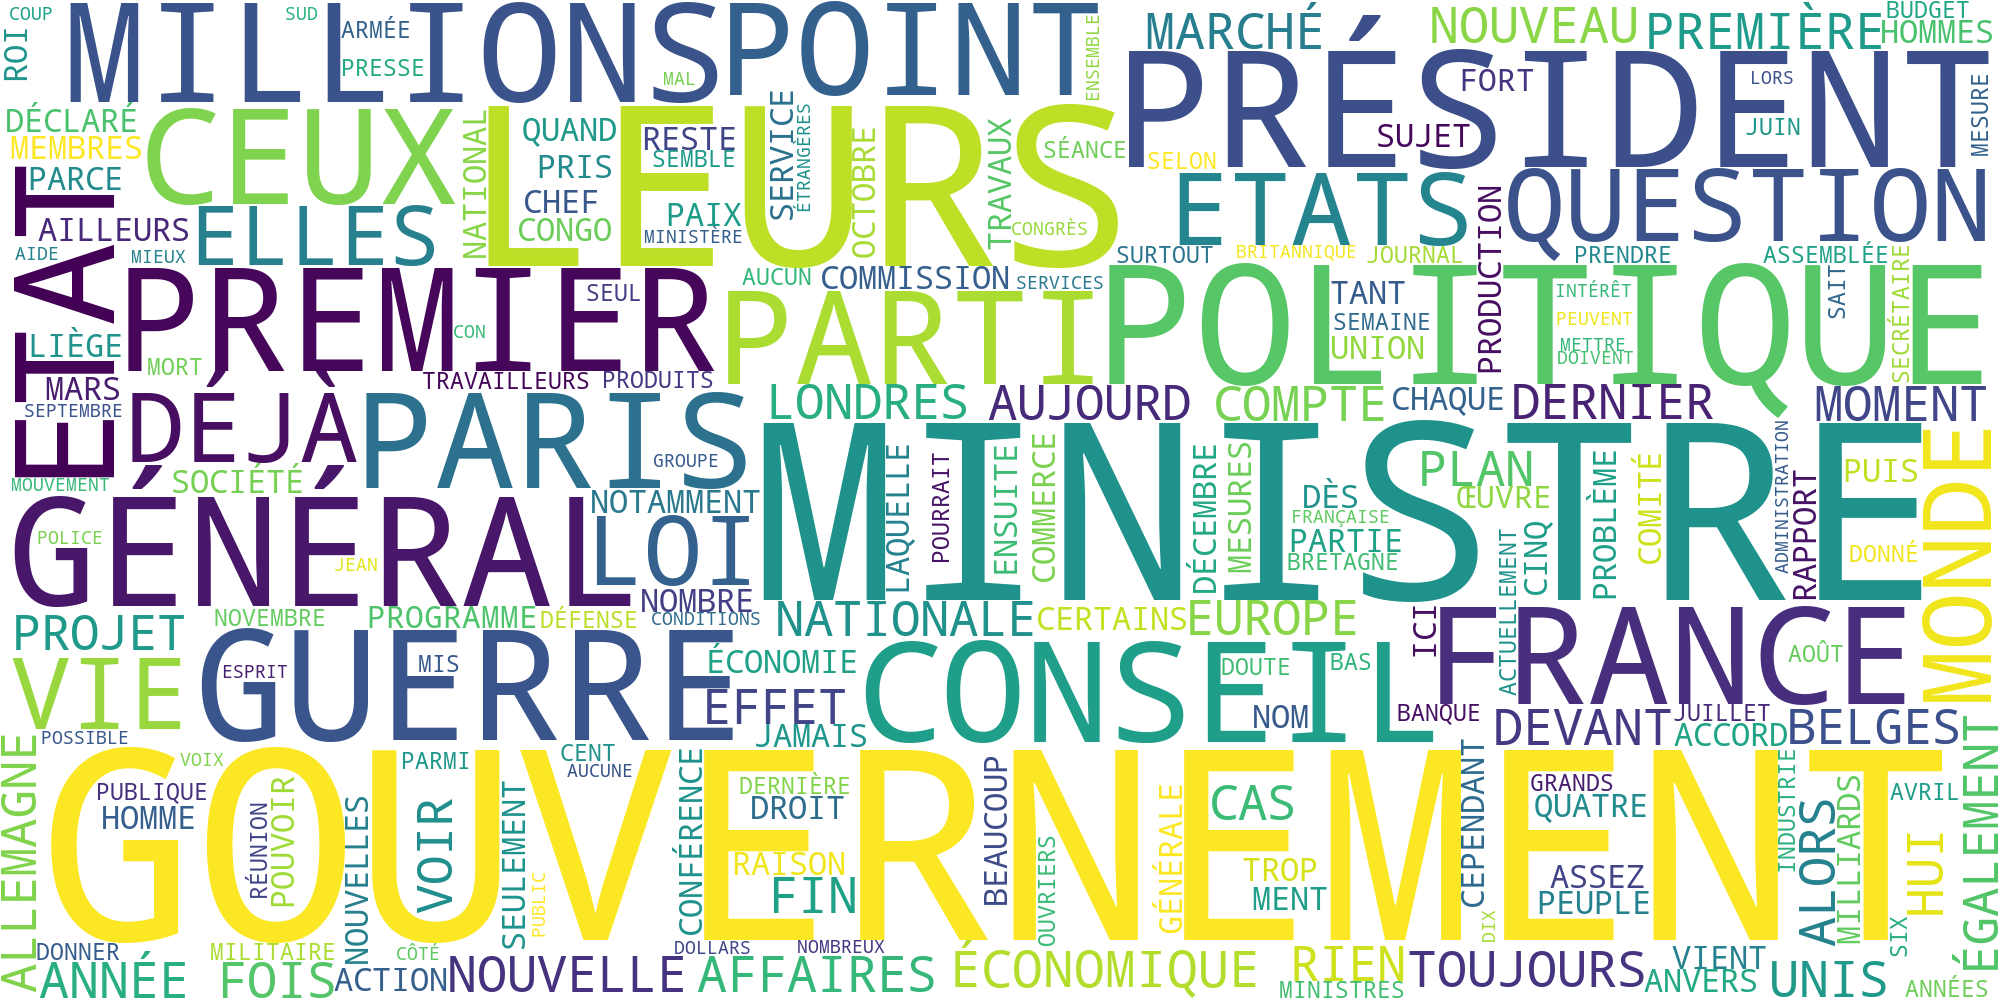

In [40]:
# Générer le nuage de mots à partir des fréquences
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)

# Nom du fichier de sortie
output_file = "tp4.png"

# Sauvegarder l'image
cloud.to_file(os.path.join(temp_path, output_file))

# Afficher l'image dans le notebook
Image(filename=os.path.join(temp_path, output_file))

In [45]:
# Prendre les 20 mots les plus fréquents
top_20 = Counter(frequencies).most_common(50)

# Afficher
for i, (mot, freq) in enumerate(top_20, start=1):
    print(f"{i}. {mot} → score : {freq}")
mot = mot-clé

#freq = fréquence ou score

#Résultat : liste des 20 mots les plus importants avec leur score

1. GOUVERNEMENT → score : 8072
2. MINISTRE → score : 6987
3. LEURS → score : 5656
4. POLITIQUE → score : 5480
5. PRÉSIDENT → score : 5207
6. GUERRE → score : 4630
7. GÉNÉRAL → score : 4505
8. PREMIER → score : 4002
9. CONSEIL → score : 3789
10. ETAT → score : 3732
11. MILLIONS → score : 3721
12. FRANCE → score : 3628
13. PARIS → score : 3479
14. CEUX → score : 3462
15. PARTI → score : 3313
16. POINT → score : 3269
17. QUESTION → score : 3262
18. ETATS → score : 3246
19. VIE → score : 3106
20. DÉJÀ → score : 3088
21. LOI → score : 3039
22. MONDE → score : 2993
23. ELLES → score : 2977
24. ÉCONOMIQUE → score : 2947
25. UNIS → score : 2879
26. FOIS → score : 2873
27. ALORS → score : 2867
28. TOUJOURS → score : 2850
29. NOUVEAU → score : 2820
30. DEVANT → score : 2779
31. NOUVELLE → score : 2751
32. ANNÉE → score : 2731
33. AFFAIRES → score : 2727
34. FIN → score : 2723
35. HUI → score : 2697
36. PREMIÈRE → score : 2678
37. MARCHÉ → score : 2652
38. PLAN → score : 2590
39. ÉGALEMENT → scor

NameError: name 'clé' is not defined